# Mushrooms classification

This notebook represents the attitude towards the task I did in the 'Introduction to Data Science and ML' course on Stepik.
Link: https://stepik.org/course/4852/syllabus

Data was gathered from Kaggle's Mushroom Classification.
Link: https://www.kaggle.com/uciml/mushroom-classification

Data was also pre-processed by the course's team. The class was changed into 1 and 0 in order to make classifying easied. It could be done by means of get_dummies as well. Additionally, y_test csv file was also taken from the course.

In [50]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [4]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [5]:
from IPython.display import HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)

Reading data from the file

In [6]:
df = pd.read_csv('training_mush.csv')

In [12]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


Creating variables to make classification:

In [14]:
X = df.drop('class', axis=1)
y = df['class']

In [16]:
rf = RandomForestClassifier(random_state=0)

Setting parameters that will be tested:

In [20]:
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 
              'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)}

In order to get best parameters it's better to use Grid Search CV which tests combination of them:

In [21]:
grid_seach_cv_clf = GridSearchCV(rf, parameters, cv=3)

In [22]:
grid_seach_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

Result:

In [23]:
grid_seach_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [24]:
best_rf = grid_seach_cv_clf.best_estimator_

It's always better to get to know which features has bigger impact on final decision. In order to represent it feature_importance that includes classifier with the best parameters will be used

In [25]:
feature_importances = best_rf.feature_importances_

In [26]:
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})

In [30]:
features_sorted = feature_importances_df.sort_values('feature_importances', ascending=False)

In [31]:
features_sorted

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


A graph may be more representative

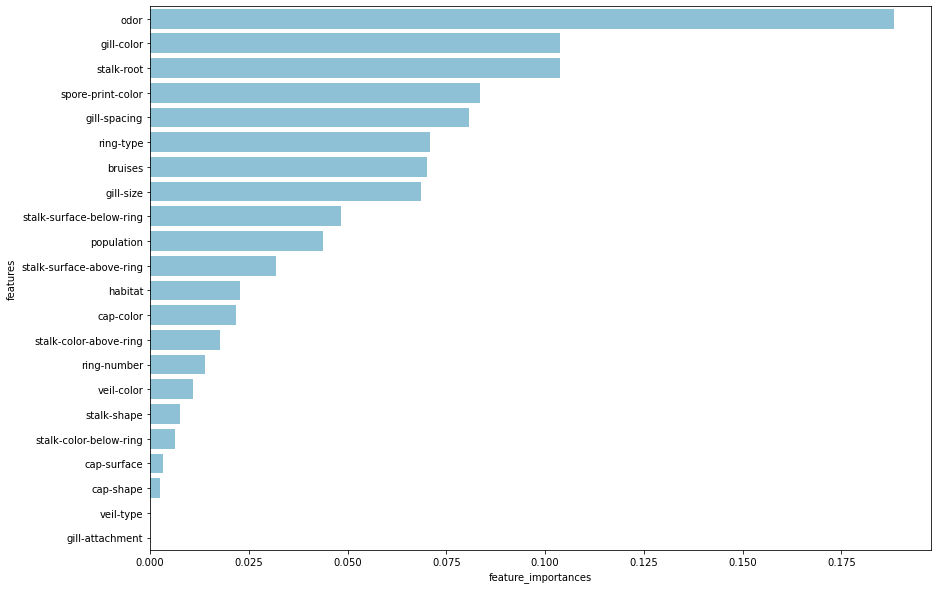

In [57]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=features_sorted,
            label="importance", color="c", ax=ax)

Now this classifier can be tested on test data

In [39]:
df_test = pd.read_csv('testing_mush.csv')

In [40]:
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [41]:
X_test = df_test

Predictions by means of imported test data are represented below. Variable 'predictions' is an array of a prediction for every
case. 0 stands non-poisonous, 1 stands for poisonous.

In [42]:
predictions = best_rf.predict(X_test)

In [46]:
predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [47]:
numb_of_each = pd.Series(predictions).value_counts()

According to predictions there are 1055 non-poisonous mushrooms and 976 poisonous.

In [48]:
numb_of_each

0    1055
1     976
dtype: int64

Test values will be imported from other test csv file.

In [52]:
y_test = pd.read_csv('testing_y_mush.csv')

Confusion matrix is needed to represent TP, FP, FN and TN cases

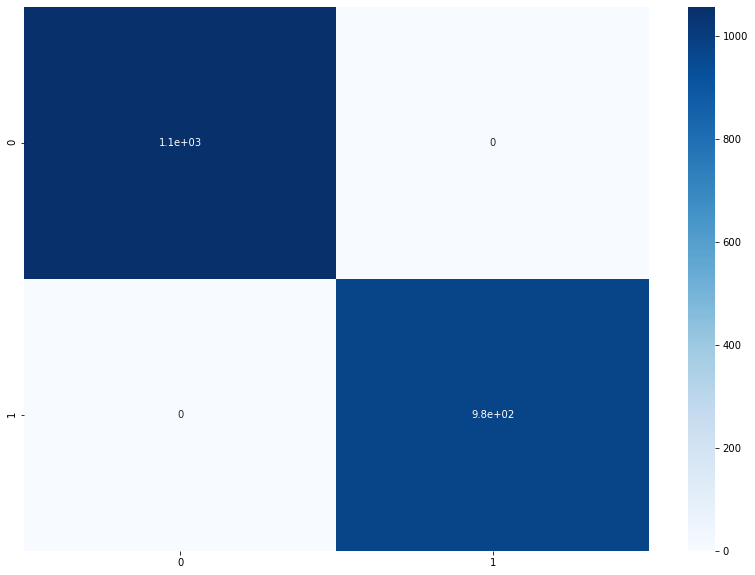

In [58]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", ax=ax)